## Sentiment Analysis with TEXTBLOB

In [1]:
!pip install spacytextblob -q

In [ ]:
!pip install wordcloud -q

In [2]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm',disable=["tagger", "parser", "attribute_ruler", "lemmatizer","ner"])
nlp.add_pipe('spacytextblob')

In [3]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7e9282a1ef30>),
 ('spacytextblob',
  <spacytextblob.spacytextblob.SpacyTextBlob at 0x7e9281ef3510>)]

In [4]:
#text = 'I hate you so much my friend'
text ='But she feels better days are to come.'
doc = nlp(text)

print("Polarity: ", doc._.blob.polarity)

Polarity:  0.5


In [5]:
def sentiment(testo):
    """ questa funct da dad dadada
    """
    doc = nlp(testo)
    return doc._.blob.polarity

In [6]:
#testo la funzione
sentiment('I hate you')

-0.8

In [7]:
import pandas as pd

df = pd.DataFrame({'text':['I like ice cream and now I am very happy','I hate you so much my friend']})
df

,text
0,I like ice cream and now I am very happy
1,I hate you so much my friend


In [8]:
df['prediction'] = df['text'].apply(sentiment)
df

,text,prediction
0,I like ice cream and now I am very happy,1.0
1,I hate you so much my friend,-0.3


In [9]:
df['prediction'].apply(lambda x: 'positive' if x >= 0 else 'negative')

,prediction
0,positive
1,negative


In [10]:
def custom_class(x):
    if x > 0.3:
        return 'positive'
    elif x < -0.3:
        return 'negative'
    else:
        return 'neutro'

In [11]:
df['sentiment'] = df['prediction'].apply(custom_class)
df

,text,prediction,sentiment
0,I like ice cream and now I am very happy,1.0,positive
1,I hate you so much my friend,-0.3,negative


### ho fatto tutto questo per VALIDARE IL FLUSSO DI LAVORO, adesso lo applico su tutti i dati!!

In [12]:
path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/netflix_reviews.csv'

dfx = pd.read_csv(path)
dfx

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,efd00499-5e00-49b5-9f32-bc7177ac5ca6,Mikel Magnusson,Netfix Canada forced my wife into a screen tha...,1,0,8.93.1 build 4 50540,2024-06-14 21:47:49,8.93.1 build 4 50540
1,be0d97e1-7de1-4f07-b493-35a53098b5a4,John McDevitt,I use this app until it asks if I'm still ther...,2,0,8.119.0 build 11 50706,2024-06-14 21:33:01,8.119.0 build 11 50706
2,8970dbcd-d75f-4016-bb93-efa5de3ef9e6,Mayur Savaliya,Boycott Netflix from Bharat,1,1,8.14.0 build 5 40129,2024-06-14 21:31:07,8.14.0 build 5 40129
3,a288bc3c-8a90-42d3-b585-1c8078faa96c,Magdalena Glessing,Little good movies and a lot of wonderful TV s...,5,0,8.118.1 build 10 50703,2024-06-14 21:27:26,8.118.1 build 10 50703
4,c388a806-0795-4812-b04e-5b2cdf327157,Elizabeth Turner,"New to this but, so far smooth sailing.app is ...",5,0,8.118.1 build 10 50703,2024-06-14 21:22:13,8.118.1 build 10 50703
...,...,...,...,...,...,...,...,...
113063,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,NaN,2019-08-03 15:06:03,NaN
113064,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250
113065,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,NaN,2020-08-17 07:26:58,NaN
113066,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,7.17.0 build 13 34346,2019-07-21 09:41:42,7.17.0 build 13 34346


In [13]:
# ci sono dei float che rompono
dfx['content'] = dfx['content'].astype(str)

In [ ]:
%%time
dfx['prediction'] = dfx['content'].apply(sentiment)
dfx

In [ ]:
dfx['sentiment'] = dfx['prediction'].apply(custom_class)
dfx

In [ ]:
positive_text = ''.join(dfx[dfx['sentiment'] == 'positive']['content'].to_list())
negative_text = ''.join(dfx[dfx['sentiment'] == 'negative']['content'].to_list())

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
stopwords = set(STOPWORDS)

#aggiungo eccezioni alla set delle stopword italiane
stopwords.update(['Netflix','app','movie','watch','movies','show','shows'])

In [ ]:
#creo funzine di plotting

def wordcloud_funct(text,color, stopwords,title):
    wordcloud1 = WordCloud(width = 3000, height = 2000,background_color=color,stopwords=stopwords)
    wordcloud1.generate(text)

    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.imshow(wordcloud1, interpolation='bilinear')
    plt.axis("off")

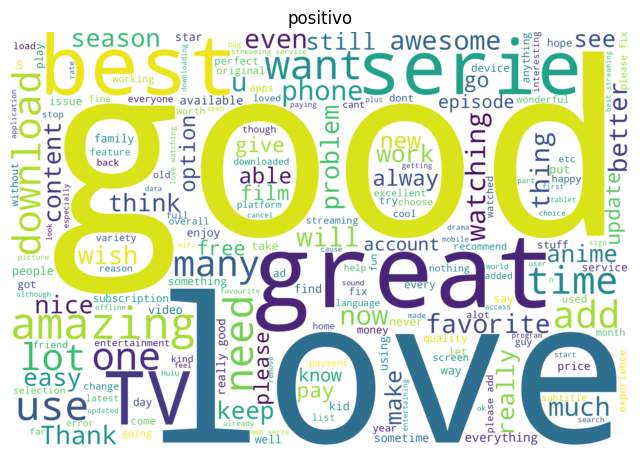

In [ ]:
wordcloud_funct(positive_text,'white',stopwords,'positivo')

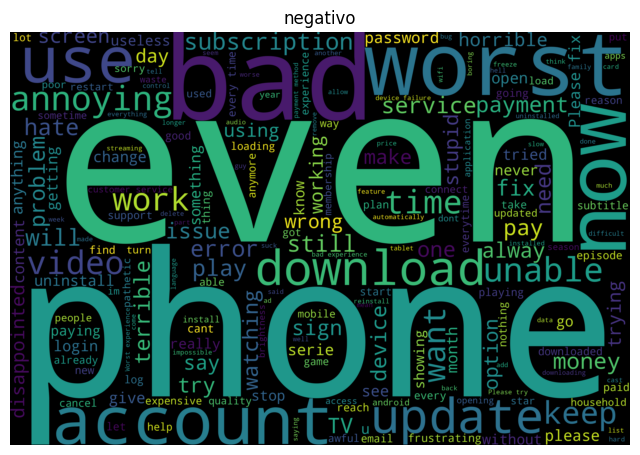

In [ ]:
wordcloud_funct(negative_text,'black',stopwords,'negativo')